In [1]:
import torch
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [2]:
X_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
Y_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')

X_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
Y_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

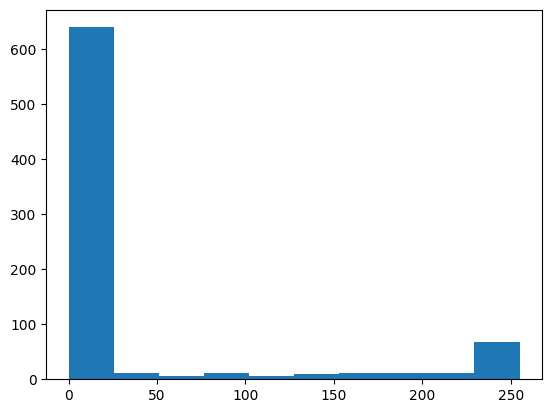

In [3]:
plt.hist(X_train[0])

In [5]:
(X_train[0] == 0).sum()

618

In [6]:
X_train[0].mean()

35.108418367346935

In [8]:
X_train.mean(), X_train.std()

(33.318421449829934, 78.56748998339798)

A Normalizálás menete képekhez. 
Az MNIST dataset csak egy színcsatornát tartalmaz. A Normalizálást színcsatornánként kell elvégezni. Nekünk most csak egy csatornánk van.
output[channel] = (input[channel] - mean[channel]) / std[channel]

Azaz az első kép esetében:
(X_train[0]-X_train.mean())/X_train.std()
(x-mean)/std

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([-0.42407389, -0.09951217,  0.22504955,  0.54961128,  0.874173  ,
         1.19873473,  1.52329645,  1.84785817,  2.1724199 ,  2.49698162,
         2.82154335]),
 <BarContainer object of 10 artists>)

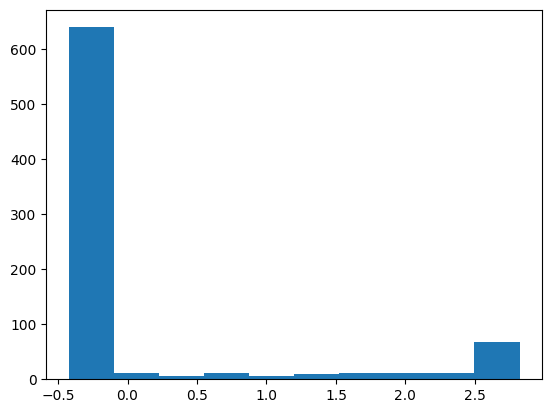

In [9]:
plt.hist((X_train[0]-X_train.mean())/X_train.std())

In [14]:
xnormalizalt = X_train[0]-X_train.mean()/X_train.std()
xnormalizalt


array([ -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42407389,
        -0.42407389,  -0.42407389,  -0.42407389,  -0.42

In [15]:
xnormalizalt[0].mean(), xnormalizalt[0].std()

(-0.424073894391566, 0.0)

In [16]:
def normalize(x, m, s): return (x-m)/s

In [18]:
X_train = normalize(X_train, X_train.mean(), X_train.std())

In [20]:
X_train.mean(), X_train.std()

(-3.064638490070051e-17, 0.9999999999999998)

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([-0.42407389, -0.09951217,  0.22504955,  0.54961128,  0.874173  ,
         1.19873473,  1.52329645,  1.84785817,  2.1724199 ,  2.49698162,
         2.82154335]),
 <BarContainer object of 10 artists>)

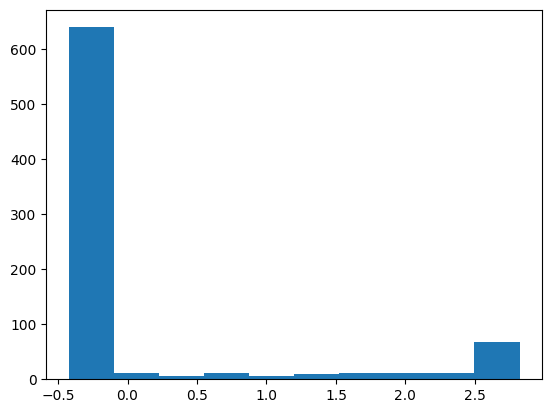

In [23]:
plt.hist(X_train[0])

In [26]:
p = np.arange(12).reshape(4, 3)
p

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [27]:
p = np.array([[ 0,  1,  2],
            [ 3,  4,  5],
            [ 6,  7,  8],
            [ 9, 10, 11]])

In [33]:
x = np.array([10, 20, 30, 40])
x

array([10, 20, 30, 40])

In [30]:
p + x

array([[10, 21, 32],
       [13, 24, 35],
       [16, 27, 38],
       [19, 30, 41]])

In [31]:
p * x

array([[  0,  20,  60],
       [ 30,  80, 150],
       [ 60, 140, 240],
       [ 90, 200, 330]])

In [34]:
np.dot(x, p)

array([600, 700, 800])

In [89]:
arr = np.arange(9, dtype = np.int64())
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [90]:
t1 = torch.from_numpy(arr)
t1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [91]:
arr[1:5] = 50
arr

array([ 0, 50, 50, 50, 50,  5,  6,  7,  8])

In [94]:
t1.detach().numpy()

array([ 0, 50, 50, 50, 50,  5,  6,  7,  8])

(array([ 4.,  4., 13., 36., 70., 65., 38., 12., 10.,  4.]),
 array([-2.98482866, -2.40000848, -1.8151883 , -1.23036812, -0.64554794,
        -0.06072776,  0.52409242,  1.1089126 ,  1.69373278,  2.27855296,
         2.86337315]),
 <BarContainer object of 10 artists>)

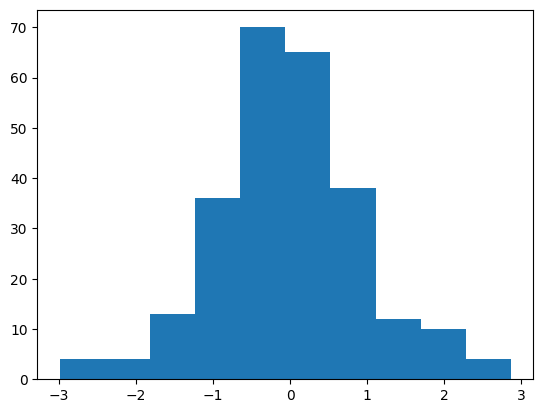

In [103]:
x = np.random.normal(0., 1, size=256)
plt.hist(x)

In [112]:
x = np.random.normal(0., 1, size=256)


for i in range(100):
    weight = np.random.normal(0., np.sqrt(2/float(256)), size=(256, 256))
    x = np.dot(x, weight)
    x = np.maximum(0, x)


x.mean(), x.std()


(0.1782893703802017, 0.2576612261579225)